In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torch import  nn


In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [ ]:
train_data =datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

class_names = train_data.classes
class_names

100%|██████████| 26421880/26421880 [00:01<00:00, 16619287.39it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 310968.19it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5601947.76it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14932418.39it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


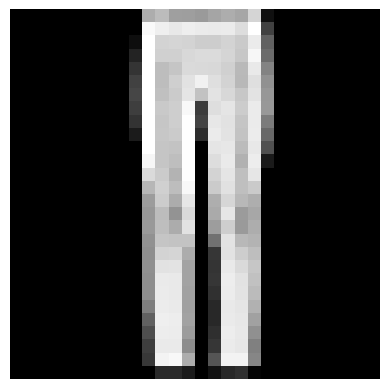

In [ ]:
batch_size=32

dtr=DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True
)

dte=DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False
)

train_features_batch, train_labels_batch = next(iter(dtr))
train_features_batch.shape, train_labels_batch.shape
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")


In [ ]:
for batch , (xtr,ytr) in enumerate(dtr):
  a=xtr
a

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
class fashion(nn.Module):
  def __init__(self):
    super().__init__()
    self.l=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=784,out_features=10),
        nn.Linear(in_features=10,out_features=len(class_names))
    )
  def forward(self,x):
    return self.l(x)

m=fashion()
l=nn.CrossEntropyLoss()
p=torch.optim.SGD(params=m.parameters(),lr=0.1)
epochs=1

In [ ]:
b=[]

ctr=[]
cte=[]

for epoch in range(epochs) :
  trloss=0
  for batch , (xtr,ytr) in enumerate(dtr):
      m.train()
      yr=m(xtr)
      loss=l(yr,ytr)
      p.zero_grad()
      loss.backward()
      p.step()

      trloss += loss
      if batch%400==0:
        b.append(batch*len(xtr))
        ctr.append(trloss.detach().numpy())
  trloss /= len(dtr)

  teloss=0
  m.eval()
  with torch.inference_mode():
    for i , (xte,yte) in enumerate(dte):
     ye=m(xte)
     teloss+=l(ye,yte)
     te =teloss.detach().numpy()

  te /= len(dte)





df=pd.DataFrame({"train_loss":ctr,"batch":b,})
print(len(cte))
df


0


,train_loss,batch
0,0.59258956,0
1,0.59258956,12800
2,0.59258956,25600
3,0.59258956,38400
4,0.59258956,51200
